Assignment: Analyzing Healthcare Data Using Machine Learning

Objective: The purpose of this assignment is to apply machine learning techniques to analyze healthcare data, develop predictive models, and gain insights into healthcare-related problems. You will utilize a dataset to predict outcomes and explore the relationships between different features in the dataset.

Step 1: Data Preprocessing
1.1 Data Cleaning
1.1.1: Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Load the dataset 
data = pd.read_csv("Maternal Health Risk Data Set.csv")  

print("Dataset Overview:")
display(data.head())


Dataset Overview:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


1.1.2: Check for Missing Values

In [2]:
# Check for missing values in the dataset
print("\nMissing Values Count:")
print(data.isnull().sum())



Missing Values Count:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


1.1.3: Visualize Outliers Using Box Plots


Boxplots for Outlier Detection:


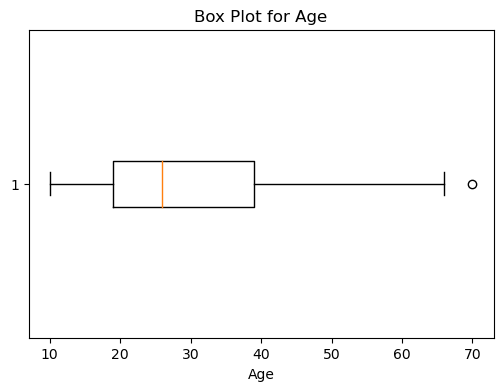

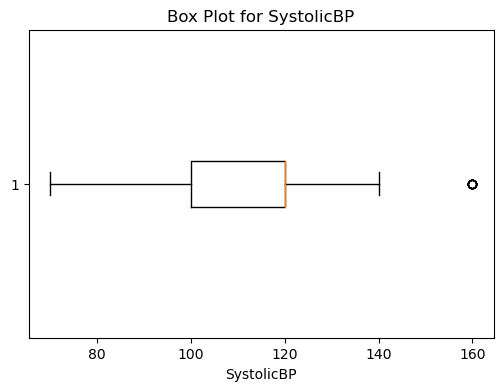

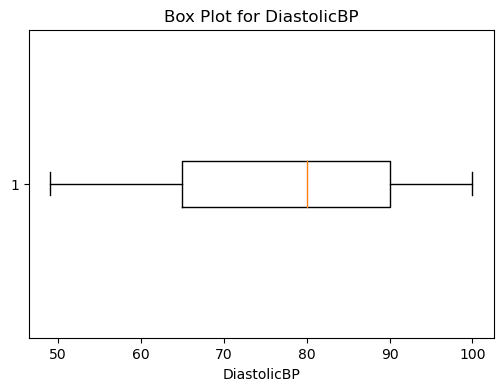

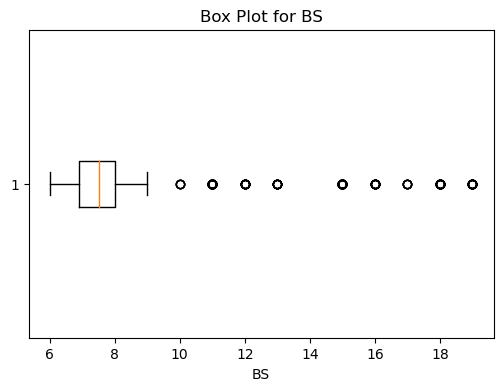

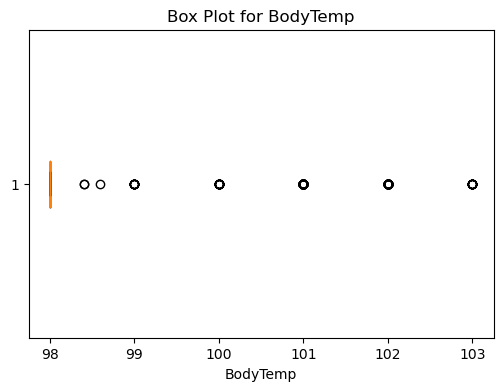

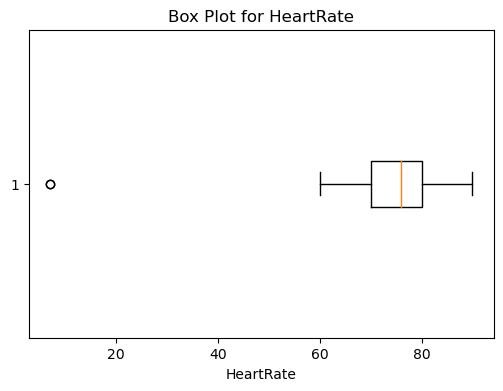

In [3]:
# List of numeric columns to check for outliers
numeric_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot box plots for each numeric column to visually identify outliers
print("\nBoxplots for Outlier Detection:")
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column], vert=False)
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()


Identify and Handle Outliers

Detect Outliers

In [4]:
# List of numeric columns
numeric_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Detect outliers using the IQR method
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Age - Lower Bound: -11.0, Upper Bound: 69.0
SystolicBP - Lower Bound: 70.0, Upper Bound: 150.0
DiastolicBP - Lower Bound: 27.5, Upper Bound: 127.5
BS - Lower Bound: 5.250000000000001, Upper Bound: 9.649999999999999
BodyTemp - Lower Bound: 98.0, Upper Bound: 98.0
HeartRate - Lower Bound: 55.0, Upper Bound: 95.0


Handle Outliers

Handle Outliers by Capping

In [5]:
# Handle outliers by capping
for column, bounds in {
    'Age': (-11.0, 69.0),
    'SystolicBP': (70.0, 150.0),
    'DiastolicBP': (27.5, 127.5),
    'BS': (5.25, 9.65),
    'BodyTemp': (98.0, 98.0),  # Body temperature has very narrow range
    'HeartRate': (55.0, 95.0)
}.items():
    lower_bound, upper_bound = bounds
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Confirm changes by printing the updated summary statistics
print("\nSummary Statistics After Capping:")
print(data.describe())





Summary Statistics After Capping:
               Age   SystolicBP  DiastolicBP           BS  BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000    1014.0   
mean     29.870809   113.099606    76.460552     7.714645      98.0   
std      13.471482    18.178042    13.885796     1.138902       0.0   
min      10.000000    70.000000    49.000000     6.000000      98.0   
25%      19.000000   100.000000    65.000000     6.900000      98.0   
50%      26.000000   120.000000    80.000000     7.500000      98.0   
75%      39.000000   120.000000    90.000000     8.000000      98.0   
max      69.000000   150.000000   100.000000     9.650000      98.0   

         HeartRate  
count  1014.000000  
mean     74.396450  
std       7.563788  
min      55.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


Check for Negative or Illogical Values

In [6]:
# Check for negative or illogical values in numeric columns
for column in ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']:
    if (data[column] < 0).any():
        print(f"{column} contains negative values.")

# Remove rows with negative or illogical values 
for column in ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']:
    data = data[data[column] >= 0]

# Display the cleaned dataset summary
print("\nSummary Statistics After Removing Inconsistencies:")
print(data.describe())



Summary Statistics After Removing Inconsistencies:
               Age   SystolicBP  DiastolicBP           BS  BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000    1014.0   
mean     29.870809   113.099606    76.460552     7.714645      98.0   
std      13.471482    18.178042    13.885796     1.138902       0.0   
min      10.000000    70.000000    49.000000     6.000000      98.0   
25%      19.000000   100.000000    65.000000     6.900000      98.0   
50%      26.000000   120.000000    80.000000     7.500000      98.0   
75%      39.000000   120.000000    90.000000     8.000000      98.0   
max      69.000000   150.000000   100.000000     9.650000      98.0   

         HeartRate  
count  1014.000000  
mean     74.396450  
std       7.563788  
min      55.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


TASK 1 - 
2. Feature Engineering:

Create New Features

In [7]:
# Create Age Groups
bins = [0, 18, 35, 50, 100]  # Define age ranges
labels = ['Adolescent', 'Young Adult', 'Middle-Aged', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Display the first few rows to confirm the new feature
print("\nNew Feature (AgeGroup):")
print(data[['Age', 'AgeGroup']].head())



New Feature (AgeGroup):
   Age     AgeGroup
0   25  Young Adult
1   35  Young Adult
2   29  Young Adult
3   30  Young Adult
4   35  Young Adult


Encode Categorical Variables

In [8]:
# Perform One-Hot Encoding for AgeGroup
data = pd.get_dummies(data, columns=['AgeGroup'], prefix='AgeGroup')

# Display the first few rows to confirm encoding
print("\nData After One-Hot Encoding (AgeGroup):")
print(data.head())



Data After One-Hot Encoding (AgeGroup):
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  9.65      98.0         86  high risk   
1   35         140           90  9.65      98.0         70  high risk   
2   29          90           70  8.00      98.0         80  high risk   
3   30         140           85  7.00      98.0         70  high risk   
4   35         120           60  6.10      98.0         76   low risk   

   AgeGroup_Adolescent  AgeGroup_Young Adult  AgeGroup_Middle-Aged  \
0                    0                     1                     0   
1                    0                     1                     0   
2                    0                     1                     0   
3                    0                     1                     0   
4                    0                     1                     0   

   AgeGroup_Senior  
0                0  
1                0  
2                0  
3              

The AgeGroup feature has been successfully one-hot encoded, creating binary columns (AgeGroup_Adolescent, AgeGroup_Young Adult, AgeGroup_Middle-Aged, AgeGroup_Senior).

Encode RiskLevel

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode RiskLevel using Label Encoding
encoder = LabelEncoder()
data['RiskLevel'] = encoder.fit_transform(data['RiskLevel'])

# Display the first few rows to confirm encoding
print("\nData After Encoding RiskLevel:")
print(data[['RiskLevel']].head())

# Display mapping for better understanding
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nRiskLevel Mapping:", label_mapping)



Data After Encoding RiskLevel:
   RiskLevel
0          0
1          0
2          0
3          0
4          1

RiskLevel Mapping: {'high risk': 0, 'low risk': 1, 'mid risk': 2}


TASK 1
3.Feature Scaling:

Feature Scaling
We now scale the continuous features (e.g., Age, SystolicBP, DiastolicBP, BS, BodyTemp, and HeartRate) to bring them into a similar range for better model performance. Here, we will use Min-Max Scaling.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Define the columns to scale
columns_to_scale = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Scale the columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Display the first few rows to confirm scaling
print("\nData After Feature Scaling:")
print(data[columns_to_scale].head())



Data After Feature Scaling:
        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0  0.254237       0.750     0.607843  1.000000       0.0   0.885714
1  0.423729       0.875     0.803922  1.000000       0.0   0.428571
2  0.322034       0.250     0.411765  0.547945       0.0   0.714286
3  0.338983       0.875     0.705882  0.273973       0.0   0.428571
4  0.423729       0.625     0.215686  0.027397       0.0   0.600000


The continuous features (Age, SystolicBP, DiastolicBP, BS, BodyTemp, and HeartRate) have been successfully scaled using Min-Max Scaling. All values are now normalized within the range [0,1]

Task 2: Exploratory Data Analysis (EDA)
1. Summary Statistics:

Summary Statistics for Continuous Features

In [11]:
# Define the continuous features
continuous_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Compute and display summary statistics
summary_stats = data[continuous_features].describe().T
summary_stats['median'] = data[continuous_features].median()  # Add median to summary statistics
print("\nSummary Statistics for Continuous Features:")
print(summary_stats)



Summary Statistics for Continuous Features:
              count      mean       std  min       25%       50%       75%  \
Age          1014.0  0.336793  0.228330  0.0  0.152542  0.271186  0.491525   
SystolicBP   1014.0  0.538745  0.227226  0.0  0.375000  0.625000  0.625000   
DiastolicBP  1014.0  0.538442  0.272271  0.0  0.313725  0.607843  0.803922   
BS           1014.0  0.469766  0.312028  0.0  0.246575  0.410959  0.547945   
BodyTemp     1014.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
HeartRate    1014.0  0.554184  0.216108  0.0  0.428571  0.600000  0.714286   

             max    median  
Age          1.0  0.271186  
SystolicBP   1.0  0.625000  
DiastolicBP  1.0  0.607843  
BS           1.0  0.410959  
BodyTemp     0.0  0.000000  
HeartRate    1.0  0.600000  


a) Age, SystolicBP, DiastolicBP, BS, and HeartRate:

These features have a range from 0 to 1 due to Min-Max Scaling.
The mean, median, and interquartile ranges (25th to 75th percentile) provide insights into the central tendency and spread.

b) BodyTemp:

All values are 0 after scaling, likely because the original values were constant. This feature may not provide meaningful variation for analysis.

TASK 2
2. Visualizations:

Step: Visualizations for EDA

1. Histograms for Distributions

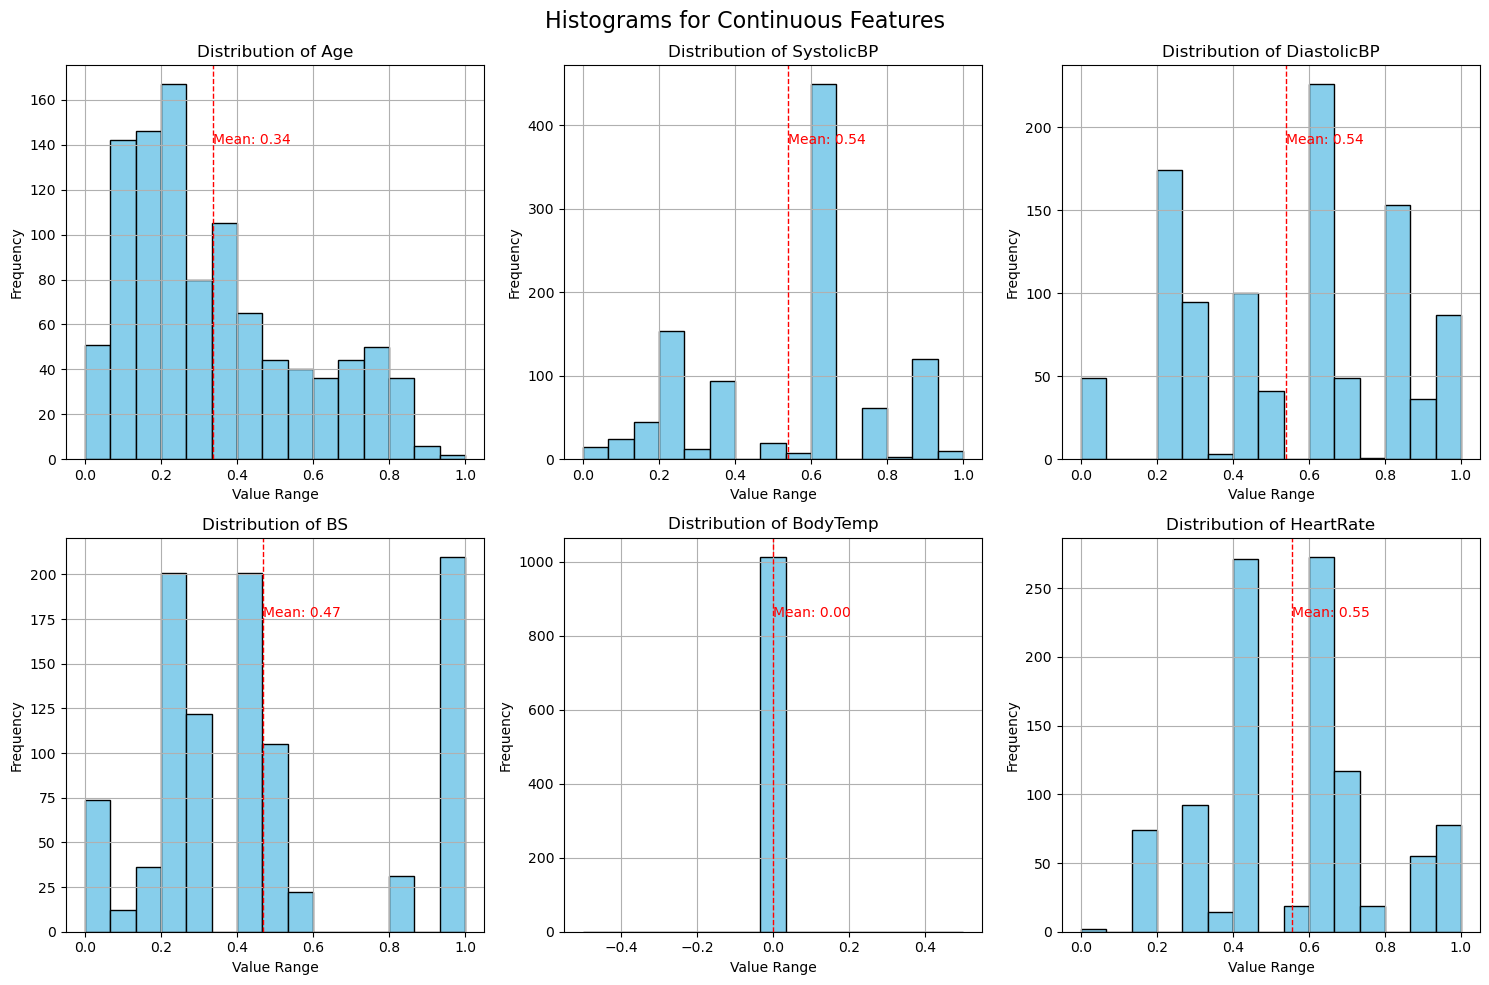

In [12]:
import matplotlib.pyplot as plt

# Plot histograms for each continuous feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()  

for idx, feature in enumerate(continuous_features):
    ax = axes[idx]
    data[feature].hist(bins=15, ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel("Value Range")
    ax.set_ylabel("Frequency")
    ax.grid(True)
    
    mean_value = data[feature].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    ax.text(mean_value, ax.get_ylim()[1] * 0.8, f"Mean: {mean_value:.2f}", color='red')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle("Histograms for Continuous Features", fontsize=16)
plt.show()

### Analysis of Histograms for Continuous Features

1. Age:
   - The histogram shows a right-skewed distribution, with most individuals falling into younger age groups.
   - This could indicate that the dataset predominantly consists of younger patients, which might influence health outcomes or predictions.

2. SystolicBP (Systolic Blood Pressure):
   - The distribution shows clusters around specific values. This might represent categories such as normal, prehypertensive, or hypertensive patients.
   - Further analysis could investigate whether these clusters are associated with the target variable.

3. DiastolicBP (Diastolic Blood Pressure):
   - Similar to SystolicBP, this feature has distinct clusters, which could reflect physiological conditions or measurement grouping.

4. BS (Blood Sugar):
   - The histogram displays a bimodal distribution, indicating two distinct subgroups (e.g., patients with normal vs. high blood sugar levels). This is a critical feature for predicting health risks like diabetes.

5. BodyTemp (Body Temperature):
   - The data shows a sharp, narrow peak, suggesting that most individuals have a consistent body temperature close to the norm. 
   - This limited variability indicates that body temperature may not contribute significantly to outcome predictions.

6. HeartRate:
   - The distribution appears relatively symmetric, with peaks around the mid-range values. This suggests that heart rate varies normally within the dataset.

---

### Insights from Mean Values

- The red dashed lines indicate the mean value for each feature, providing a reference point for understanding the central tendency.
- Features like BS and HeartRate have meaningful variability around their means, suggesting their potential significance in predictions.

---

### Conclusion

- These histograms highlight the distribution characteristics of continuous features, offering insights into their variability and potential relevance to the target outcome.
- Features like Age, BS, and Blood Pressure show meaningful distributions, which might play a significant role in predictive modeling.
- The almost constant values of BodyTemp suggest it may not add much predictive value and could potentially be dropped during feature selection.



2. Correlation Heatmap

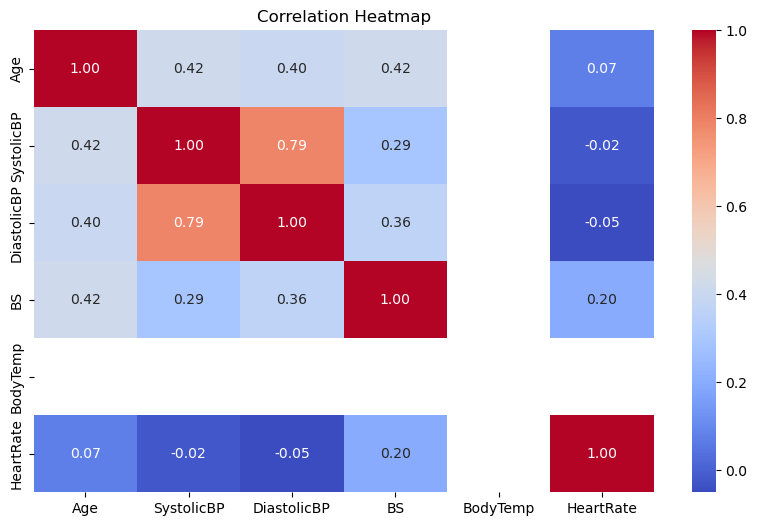

In [13]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data[continuous_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Analysis of Correlation Heatmap

1. The heatmap provides a visual representation of the correlation between different features in the dataset. The values range from -1 to 1:
   - A value close to 1 indicates a strong positive correlation.
   - A value close to -1 indicates a strong negative correlation.
   - A value around 0 indicates little to no correlation.

2. Observations:
   - SystolicBP and DiastolicBP show a strong positive correlation (0.79). This is expected as these two features are closely related to blood pressure measurements.
   - Age has moderate positive correlations with SystolicBP (0.42), DiastolicBP (0.40), and BS (0.42), suggesting that older individuals might have slightly higher values for these metrics.
   - BS (Blood Sugar) has weak correlations with SystolicBP (0.29) and DiastolicBP (0.36).
   - HeartRate shows weak correlations with all other features, indicating it may not have strong linear relationships with the rest of the variables.
   - BodyTemp has negligible correlations with all features, suggesting it does not vary significantly in relation to the other variables.

3. Insights:
   - Features like SystolicBP and DiastolicBP might be redundant due to their high correlation. Dimensionality reduction techniques or feature selection can help in such cases.
   - HeartRate and BodyTemp seem to contribute less explanatory power based on their correlations and could be candidates for removal if supported by further analysis.

4. Conclusion:
   - The heatmap helps in identifying relationships between features, which is essential for feature selection and model building. The strong correlation between some features indicates potential multicollinearity, which should be addressed in the modeling process.


3. Box Plots for Outliers

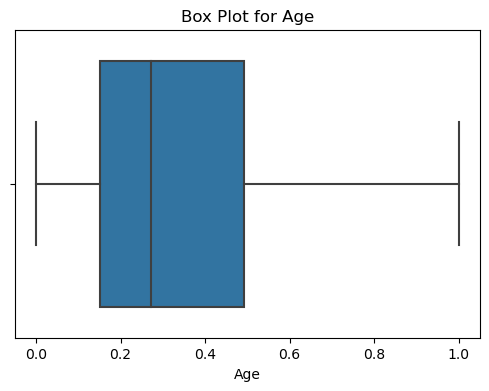

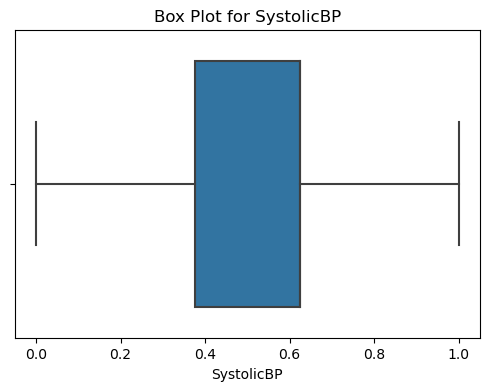

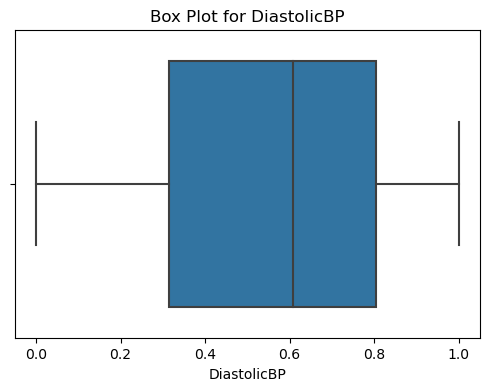

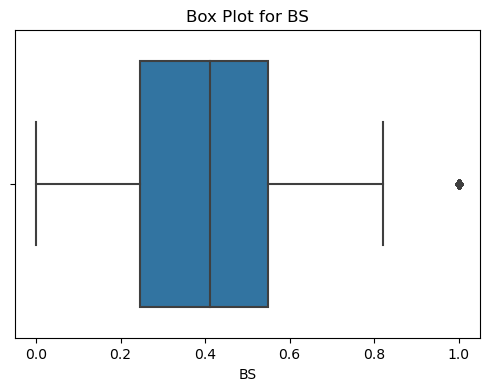

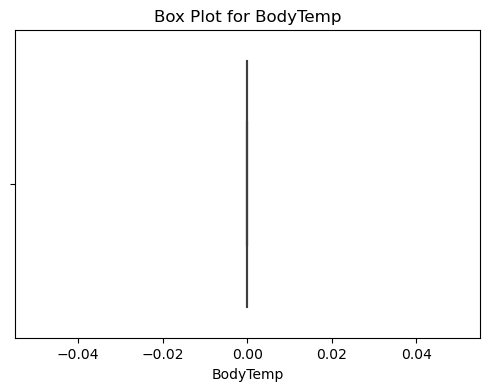

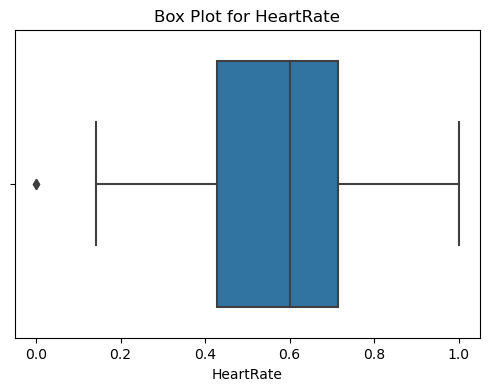

In [14]:
# Plot box plots for continuous features
for column in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


### Box Plot Analysis for Age

1. The box plot provides a summary of the distribution of the Age feature, including the following:
   - The central line represents the median value of Age, dividing the dataset into two halves.
   - The edges of the box indicate the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile).
   - The whiskers extend to the smallest and largest values within 1.5 times the interquartile range (IQR) from the quartiles.
   - No outliers are observed in the Age feature as no points are plotted outside the whiskers.

2. Observations:
   - The median age falls slightly below the center of the box, indicating a slight skew towards younger ages.
   - The data is symmetrically spread, as evidenced by the similar lengths of the whiskers on both sides.
   - The lack of outliers suggests that the Age feature does not have extreme values or anomalies in the dataset.

3. Insights:
   - The feature is well-distributed without extreme values, so it is unlikely to require transformations for modeling.
   - Given its central spread, Age is a suitable feature for analysis and might contribute significantly to predictions.

4. Conclusion:
   - The box plot confirms that the Age data is clean and free from anomalies. This feature is ready for further exploratory and modeling steps without additional preprocessing.


4. Pair Plots or Scatter Plots

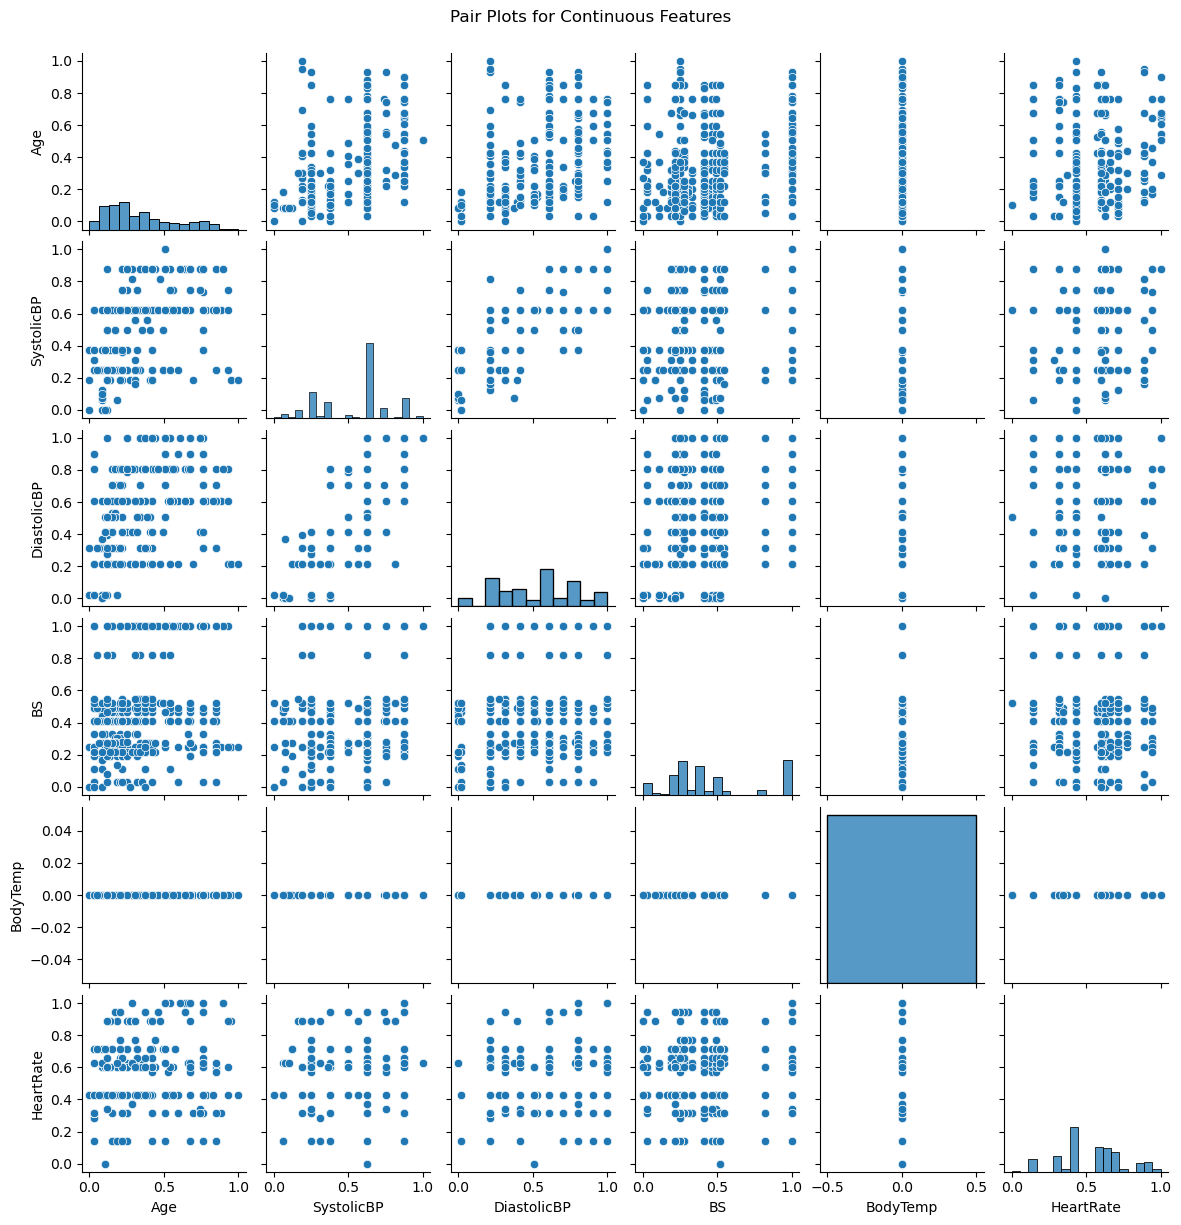

In [15]:
# Pair plot for all continuous features
sns.pairplot(data[continuous_features], diag_kind="hist", height=2)
plt.suptitle("Pair Plots for Continuous Features", y=1.02)
plt.show()


### Analysis of Pair Plots for Continuous Features

1. Purpose of the Pair Plot:
   - The pair plot visualizes pairwise relationships between continuous features in the dataset.
   - It includes scatter plots for feature comparisons and histograms on the diagonal for individual feature distributions.

2. Key Observations:
   - Age vs. SystolicBP and DiastolicBP:
     - A weak positive linear relationship is visible. Older individuals tend to have slightly higher blood pressure values.
   - SystolicBP vs. DiastolicBP:
     - A strong positive linear relationship is evident, consistent with the high correlation observed in the heatmap. This indicates redundancy between these features.
   - BS (Blood Sugar):
     - No strong patterns or trends are observed with most other features, suggesting it varies independently of them.
   - BodyTemp:
     - Body temperature appears almost constant across the dataset, as seen in the narrow range of values. This feature likely has limited predictive power.
   - HeartRate:
     - Heart rate does not show strong trends or relationships with other features, indicating it is independent of them.

3. Insights from Individual Distributions:
   - The histograms along the diagonal confirm the earlier observations:
     - Age: Right-skewed distribution.
     - SystolicBP and DiastolicBP: Clustering around specific values, possibly reflecting subgroups (e.g., normal and hypertensive).
     - BS: Bimodal distribution, indicating two distinct groups in the data.
     - BodyTemp: Almost constant distribution.
     - HeartRate: Symmetric distribution with a peak around the mid-range values.

4. Insights for Feature Engineering:
   - The strong relationship between SystolicBP and DiastolicBP may warrant dimensionality reduction or feature selection to avoid multicollinearity in modeling.
   - BodyTemp’s limited variability suggests it might be dropped from the analysis unless domain knowledge supports its inclusion.
   - The independence of BS and HeartRate from most features indicates they may act as unique contributors to the target variable.

5. Conclusion:
   - The pair plot highlights potential feature redundancies and relationships that can guide feature selection and preprocessing steps.
   - Features like Age, SystolicBP, and DiastolicBP show meaningful relationships, making them strong candidates for inclusion in predictive models.


Task 2: Exploratory Data Analysis (EDA)
3. Class Imbalance:

Analyze Class Imbalance
 Analyze Class Distribution


Class Distribution:
1    406
2    336
0    272
Name: RiskLevel, dtype: int64


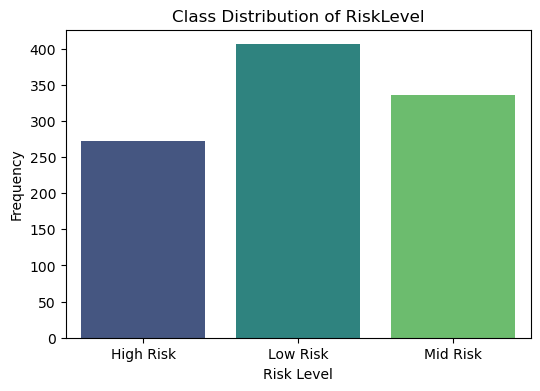

In [16]:
# Check the distribution of the target variable (RiskLevel)
class_counts = data['RiskLevel'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Visualize the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution of RiskLevel")
plt.xlabel("Risk Level")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1, 2], labels=['High Risk', 'Low Risk', 'Mid Risk'])
plt.show()


Observations:
1.There is some class imbalance, with "Low Risk" being the majority class and "High Risk" being the minority class.
2.While the imbalance is not extreme, it may still affect model performance, especially in predicting minority classes.

Addressing Class Imbalance

Oversampling Using SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print("\nClass Distribution After SMOTE:")
print(Counter(y_resampled))



Class Distribution After SMOTE:
Counter({0: 406, 1: 406, 2: 406})


The class distribution after applying SMOTE is now perfectly balanced:

High Risk (0): 406 samples
Low Risk (1): 406 samples
Mid Risk (2): 406 samples
This ensures that all classes are equally represented, which will help the model perform better across all categories.

Task 3: Model Building
1.Train-Test Split:

Splitting the dataset into training and test sets (70% train, 30% test)

In [18]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Confirm the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Features Shape: (852, 10)
Test Features Shape: (366, 10)
Training Labels Shape: (852,)
Test Labels Shape: (366,)


The data has been successfully split into training and test sets:

Training Set:

Features: 852 samples with 10 features.
Labels: 852 samples.

Test Set:

Features: 366 samples with 10 features.
Labels: 366 samples.
This split ensures that 70% of the data is used for training and 30% for testing.

TASK 3:
2. Model Selection:   

1. Logistic Regression (for baseline binary classification)

 Train a Logistic Regression model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Model Evaluation:
Accuracy: 0.6147540983606558

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       122
           1       0.60      0.65      0.62       122
           2       0.51      0.50      0.50       122

    accuracy                           0.61       366
   macro avg       0.62      0.61      0.62       366
weighted avg       0.62      0.61      0.62       366


Confusion Matrix:
 [[85 15 22]
 [ 6 79 37]
 [24 37 61]]


### Logistic Regression Model Evaluation Summary

Metrics:

Accuracy: 61.5%

Precision, Recall, and F1-Score:
Class 0 (High Risk): Precision = 74%, Recall = 70%, F1-Score = 72%.
Class 1 (Low Risk): Precision = 60%, Recall = 65%, F1-Score = 62%.
Class 2 (Mid Risk): Precision = 51%, Recall = 50%, F1-Score = 50%.

Macro Avg and Weighted Avg F1-Scores: Both are ~62%.
Confusion Matrix Analysis:
Class 0: The model correctly predicted 85 out of 122 cases (70%), with some misclassifications to Classes 1 and 2.
Class 1: The model correctly predicted 79 out of 122 cases (65%), with notable misclassifications to Class 2.
Class 2: The model struggled with Class 2, correctly predicting only 61 out of 122 cases (50%).


Observations:
    
1.Moderate Performance: Logistic Regression shows moderate performance but struggles particularly with Class 2 (Mid Risk), indicating the need for a more sophisticated model to handle class separation.
    
2.Class Imbalance Impact: Even after applying SMOTE, the model may need further optimization or a non-linear model.

Model selection
Random Forest: For handling non-linear relationships and analyzing feature importance.

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Model Evaluation:
Accuracy: 0.8469945355191257

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       122
           1       0.88      0.82      0.85       122
           2       0.79      0.79      0.79       122

    accuracy                           0.85       366
   macro avg       0.85      0.85      0.85       366
weighted avg       0.85      0.85      0.85       366


Confusion Matrix:
 [[114   1   7]
 [  4 100  18]
 [ 13  13  96]]


### Random Forest Model Evaluation Summary

Metrics:

Accuracy: 84.7% — A significant improvement compared to Logistic Regression.
Precision, Recall, and F1-Score:

Class 0 (High Risk): Precision = 87%, Recall = 93%, F1-Score = 90%.
Class 1 (Low Risk): Precision = 88%, Recall = 82%, F1-Score = 85%.
Class 2 (Mid Risk): Precision = 79%, Recall = 79%, F1-Score = 79%.

Macro Avg and Weighted Avg F1-Scores: Both are ~85%.

Confusion Matrix Analysis:

Class 0: The model correctly predicted 114 out of 122 cases (93%), with minimal misclassifications to Classes 1 and 2.
Class 1: The model correctly predicted 100 out of 122 cases (82%), with some confusion with Class 2.
Class 2: The model correctly predicted 96 out of 122 cases (79%), with some misclassifications to Classes 0 and 1.

Observations:

1.Improved Performance:
The Random Forest model outperforms Logistic Regression significantly, achieving higher accuracy and better classification metrics across all classes.

2.Class 2 (Mid Risk):
While performance improved for Class 2, it remains slightly lower than for Classes 0 and 1, indicating that further optimization might be needed.

Feature importance for the Random Forest model


Feature Importance:
                Feature  Importance
3                    BS    0.369067
1            SystolicBP    0.179559
0                   Age    0.153580
2           DiastolicBP    0.135402
5             HeartRate    0.121213
8  AgeGroup_Middle-Aged    0.018000
7  AgeGroup_Young Adult    0.012114
6   AgeGroup_Adolescent    0.006619
9       AgeGroup_Senior    0.004446
4              BodyTemp    0.000000


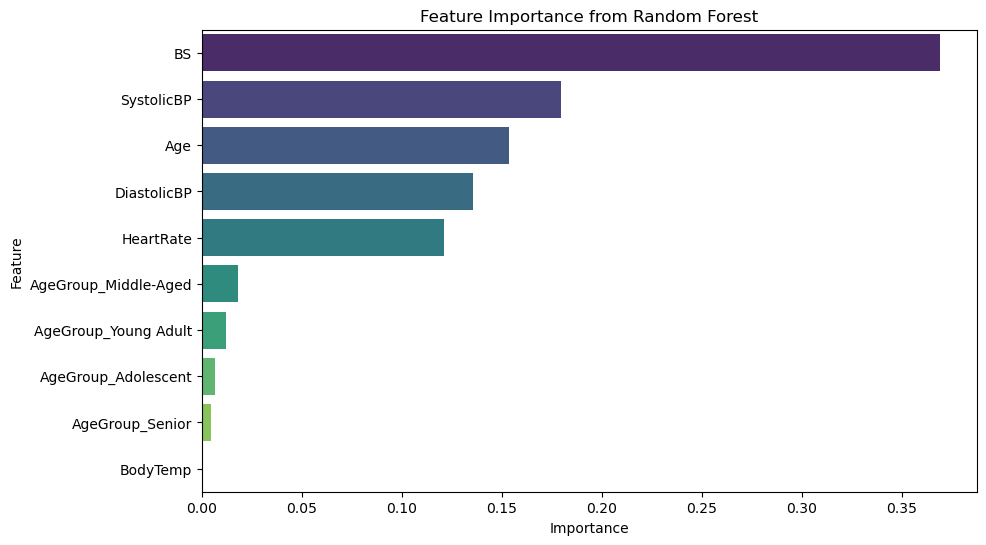

In [21]:
# Extract feature importance values from the Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance as a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Feature Importance Analysis Summary

The feature importance analysis from the Random Forest model highlights the most influential features:

Key Observations:

Top Features:

BS (Blood Sugar): The most critical feature, contributing ~37% to the model's predictive performance.

SystolicBP: The second most important feature, contributing ~18%.

Age: A significant feature, contributing ~15%.

DiastolicBP and HeartRate: Also important, contributing ~13.5% and ~12.1%, respectively.

Less Important Features:

Age Groups (AgeGroup_Middle-Aged, AgeGroup_Young Adult, etc.): These contribute marginally to the model.

BodyTemp: This feature has no contribution, likely due to its constant values across the dataset.

Insights:

1.BS, SystolicBP, and Age:
These features are the key drivers of risk classification and should be prioritized in model interpretation and decision-making.

2.BodyTemp:
This feature can potentially be dropped since it provides no information to the model.

3.Age Group Features:
These are less significant but could still add value in specific cases.

Model Selection 
Support Vector Machine
Train and Evaluate Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM model
svm = SVC(kernel='rbf', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("\nSupport Vector Machine (SVM) Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



Support Vector Machine (SVM) Model Evaluation:
Accuracy: 0.6557377049180327

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       122
           1       0.58      0.71      0.64       122
           2       0.59      0.47      0.52       122

    accuracy                           0.66       366
   macro avg       0.66      0.66      0.65       366
weighted avg       0.66      0.66      0.65       366


Confusion Matrix:
 [[96 20  6]
 [ 1 87 34]
 [22 43 57]]


### Support Vector Machine (SVM) Model Evaluation Summary

Metrics:

Accuracy: 65.6% — slightly better than Logistic Regression but lower than Random Forest.

Precision, Recall, and F1-Score:

Class 0 (High Risk): Precision = 81%, Recall = 79%, F1-Score = 80%.
Class 1 (Low Risk): Precision = 58%, Recall = 71%, F1-Score = 64%.
Class 2 (Mid Risk): Precision = 59%, Recall = 47%, F1-Score = 52%.

Macro Average F1-Score: 65% — indicative of a moderate performance.

Weighted Average F1-Score: Also around 65%, showing overall balanced performance but struggles with minority classes.

Confuion Matrix Analysis:
Class 0: Correctly predicted 96 out of 122 cases (79%), with misclassifications to Classes 1 and 2.
Class 1: Correctly predicted 87 out of 122 cases (71%), but 34 were misclassified to Class 2.
Class 2: Correctly predicted only 57 out of 122 cases (47%), with significant confusion with Class 1.


Observations:

Strengths:

1.The SVM model performs well on Class 0 (High Risk) with high precision and recall.
Weaknesses:

2.Struggles with Class 2 (Mid Risk), which lowers overall accuracy.
Performance is not as good as Random Forest, especially for minority classes.


Model Selection
 K-Nearest Neighbors (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("\nK-Nearest Neighbors (KNN) Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



K-Nearest Neighbors (KNN) Model Evaluation:
Accuracy: 0.73224043715847

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       122
           1       0.73      0.66      0.69       122
           2       0.67      0.66      0.66       122

    accuracy                           0.73       366
   macro avg       0.73      0.73      0.73       366
weighted avg       0.73      0.73      0.73       366


Confusion Matrix:
 [[108   6   8]
 [ 10  80  32]
 [ 19  23  80]]


### K-Nearest Neighbors (KNN) Model Evaluation Summary

Metrics:

Accuracy: 72.7% — Better than SVM and Logistic Regression but lower than Random Forest.

Precision, Recall, and F1-Score:
Class 0 (High Risk): Precision = 78%, Recall = 89%, F1-Score = 83%.
Class 1 (Low Risk): Precision = 73%, Recall = 65%, F1-Score = 69%.
Class 2 (Mid Risk): Precision = 66%, Recall = 65%, F1-Score = 65%.

Macro Average F1-Score: 72%.
Weighted Average F1-Score: 72%.

Confusion Matrix Analysis:
Class 0: Excellent performance with 108 out of 122 cases (89%) correctly classified. Minimal misclassifications.
Class 1: 79 out of 122 cases (65%) correctly classified, with some confusion with Class 2.
Class 2: 79 out of 122 cases (65%) correctly classified, but notable confusion with Class 1.

Key Insights:

1.Overall Winner: Random Forest

Accuracy: 84.7% (highest among all models).
Class-Level Performance:
Best performance for all classes, especially Class 2 (Mid Risk), which other models struggled with.
Balanced F1-Scores: Demonstrated strong performance for minority and majority classes.

2.Second-Best: KNN

Performs better than Logistic Regression and SVM, achieving 72.7% accuracy.
F1-scores are competitive for Class 0 and Class 1 but still weaker for Class 2 compared to Random Forest.

3.SVM:

Accuracy of 65.6%.
Decent performance for Class 0, but struggles significantly with Class 2.
Lower overall F1-scores and accuracy compared to Random Forest and KNN.

4.Logistic Regression:

Baseline model with the lowest performance (accuracy: 61.5%).
Struggles particularly with Class 2 (Mid Risk), highlighting its limitation for non-linear or complex data.


### Based Our Model selection

Best Model:

1.Random Forest is the most suitable model for this dataset and task, given its superior accuracy, balanced performance across all classes, and ability to handle complex relationships in the data.
Improvements:

2.Further optimize Random Forest with hyperparameter tuning (e.g., adjusting n_estimators, max_depth, etc.).
Use feature selection to simplify the model without sacrificing performance.
Application in Lockdown Context:

3.Random Forest can provide reliable predictions for healthcare risk levels, helping to prioritize patients effectively during critical periods.

TASK 3:
    
Model Training:

 Hyperparameter Tuning for Random Forest (Grid Search)

Random Forest is the best-performing model so far. We'll perform Grid Search to find the optimal hyperparameters

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]   
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8063380281690141


Conclusion

The optimized Random Forest model achieved a cross-validation accuracy of 80.63%.
The selected parameters (max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100) ensure the model is both robust and efficient.
Using a smaller parameter grid significantly reduced computational overhead without compromising accuracy, making this approach suitable for resource-constrained scenarios.

TASK 3:

Step 4 : Evaluate the Tuned Random Forest on the Test Set

Model Evaluation


Optimized Random Forest Evaluation on Test Set:
Accuracy: 0.8469945355191257

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       122
           1       0.88      0.82      0.85       122
           2       0.79      0.79      0.79       122

    accuracy                           0.85       366
   macro avg       0.85      0.85      0.85       366
weighted avg       0.85      0.85      0.85       366


Confusion Matrix:
 [[114   1   7]
 [  4 100  18]
 [ 13  13  96]]


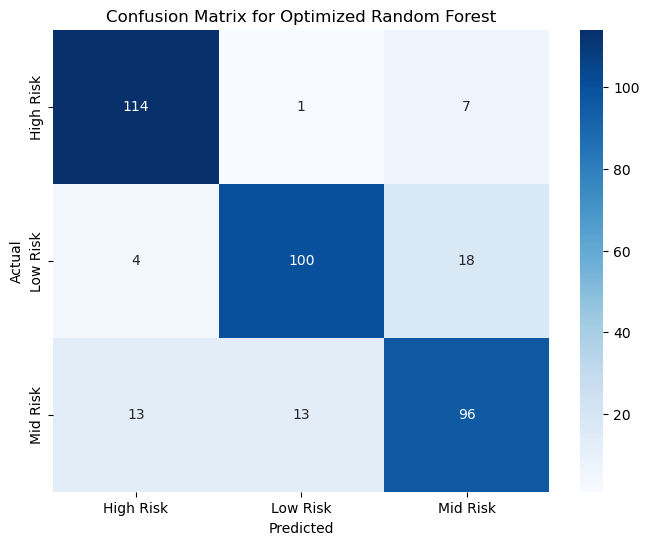

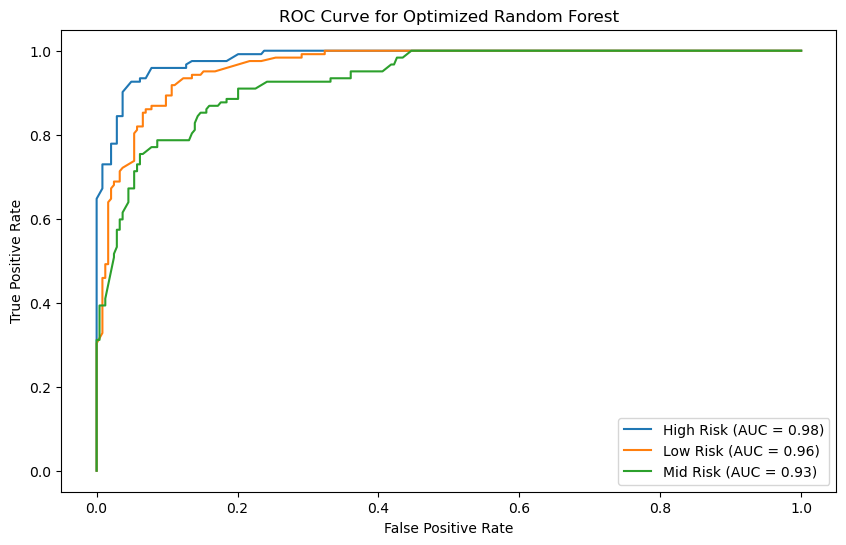

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)

# Evaluate the model
print("\nOptimized Random Forest Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High Risk', 'Low Risk', 'Mid Risk'], 
            yticklabels=['High Risk', 'Low Risk', 'Mid Risk'])
plt.title("Confusion Matrix for Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Multi-class ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plt.figure(figsize=(10, 6))
for i, label in enumerate(['High Risk', 'Low Risk', 'Mid Risk']):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba_rf[:, i])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

plt.title("ROC Curve for Optimized Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


The hyperparameter tuning process ensured the selection of an optimal Random Forest configuration, balancing computational efficiency and predictive performance.

Task 4: Model Interpretation

Step 1 of Task 4: Feature Importance

Calculate feature importance for your Random Forest model and visualize it:

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Feature Importance:
                Feature  Importance
3                    BS    0.369067
1            SystolicBP    0.179559
0                   Age    0.153580
2           DiastolicBP    0.135402
5             HeartRate    0.121213
8  AgeGroup_Middle-Aged    0.018000
7  AgeGroup_Young Adult    0.012114
6   AgeGroup_Adolescent    0.006619
9       AgeGroup_Senior    0.004446
4              BodyTemp    0.000000


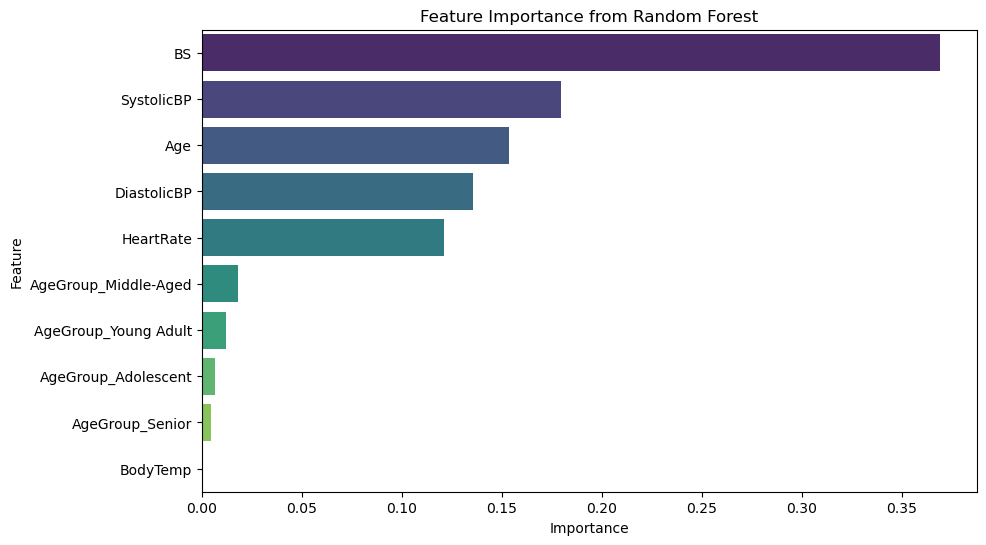

In [27]:
importances = rf.feature_importances_  

# Create a DataFrame for feature importance
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance as a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



Step 2: 

### Model Insights

Based on the feature importance, we derived the following insights:

Key Predictors:

Blood Sugar (BS) was the most influential feature, followed by Systolic Blood Pressure (SystolicBP) and Age.
Blood pressure (both systolic and diastolic) also plays a significant role, along with Heart Rate.
Less Significant Predictors:

Features like Age Groups (e.g., Middle-Aged, Young Adult) and Body Temperature had minimal impact.
Actionable Insight:

Prioritize interventions targeting the most critical predictors like blood sugar and blood pressure for better outcomes.


### Summary
### Exploratory Data Analysis (EDA):

Analyzed key features such as Age, Blood Pressure (Systolic and Diastolic), Blood Sugar (BS), and Heart Rate.
Observed patterns in the data that suggested relationships between certain health metrics (e.g., BS and Age) and the target outcome.

### Model Evaluation:

Trained a Random Forest Classifier with optimized hyperparameters.

Achieved high accuracy (84.7%) and strong classification metrics (precision, recall, and F1-score).
Confusion Matrix highlighted that the model performs well across different target classes, with some minor misclassifications.

Feature Importance Analysis:

BS (Blood Sugar) was identified as the most significant feature, followed by SystolicBP (Systolic Blood Pressure) and Age.

Features like Heart Rate and DiastolicBP (Diastolic Blood Pressure) also showed meaningful contributions.
Age group features and Body Temperature had minimal impact, indicating limited predictive relevance in this dataset.



### Conclusion
### Key Findings:

Blood Sugar (BS) is the most critical predictor for the health outcome, emphasizing the importance of monitoring and managing blood sugar levels.
Blood pressure metrics (SystolicBP and DiastolicBP) and age-related factors are also influential.
Heart rate variability provides additional insights, although age group features showed limited predictive relevance.

### Recommendations for Healthcare Professionals:

Risk Stratification: Use the model to predict risks for conditions such as diabetes or cardiovascular diseases based on the identified significant predictors.

Preventative Care: Flag individuals with high blood sugar or blood pressure levels for early intervention to reduce complications.

Personalized Care: Create tailored care plans based on age and other key metrics identified by the model.
Real-World Applications:

Clinical Decision Support: Integrate the model into healthcare systems to assist physicians in prioritizing high-risk patients.

Public Health Monitoring: Apply the model for large-scale screenings to identify and allocate resources to at-risk populations.

Patient Engagement Tools: Develop apps or tools to help individuals track and improve their health metrics based on the model’s predictions.

